In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



Breast Cancer Classifier

In [2]:

url_classification = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data_classification = pd.read_csv(url_classification, header=None, names=columns)

data_classification['Diagnosis'] = data_classification['Diagnosis'].map({'M': 1, 'B': 0})

X_classification = data_classification.drop(['ID', 'Diagnosis'], axis=1)
y_classification = data_classification['Diagnosis']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

     



Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1-Score: 0.9593495934959351


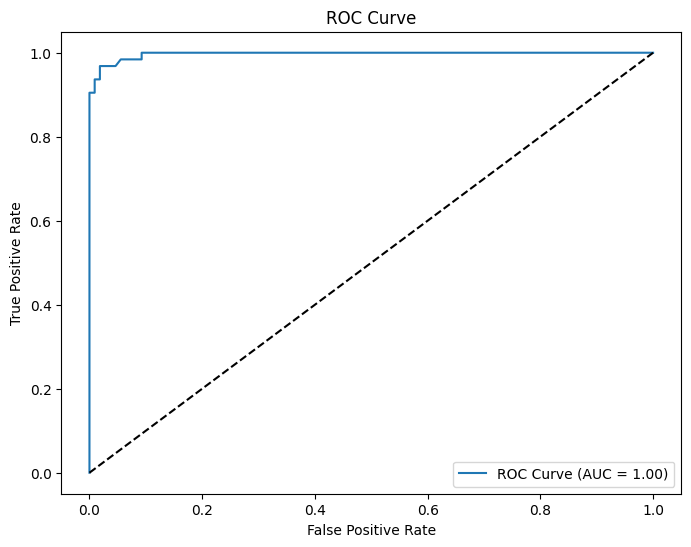

In [3]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train_clf, y_train_clf)

y_pred_clf = rf_clf.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

y_pred_prob = rf_clf.predict_proba(X_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_prob)
roc_auc = roc_auc_score(y_test_clf, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

**California Housing Regressor**



In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [6]:
housing = fetch_california_housing()
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data['target'] = housing.target
     

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
     

In [8]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
     

from sklearn.metrics import mean_squared_error

In [10]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf_regressor.predict(X_test)
     

mse = mean_squared_error(y_test, y_pred)
     

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.26


In [13]:
from sklearn.metrics import r2_score
     

r2 = r2_score(y_test, y_pred)
     

print(f'R-squared: {r2:.2f}')

R-squared: 0.81


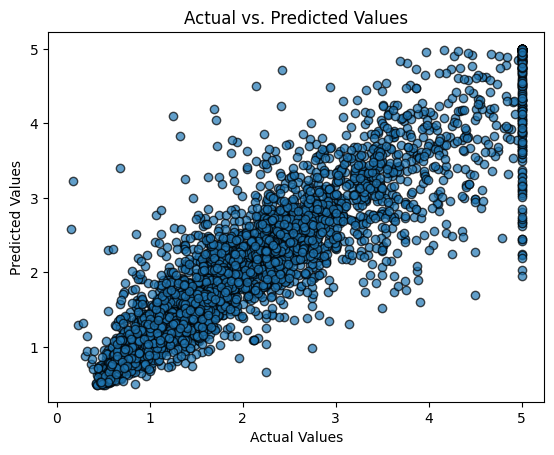

In [14]:
plt.figure()
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
     